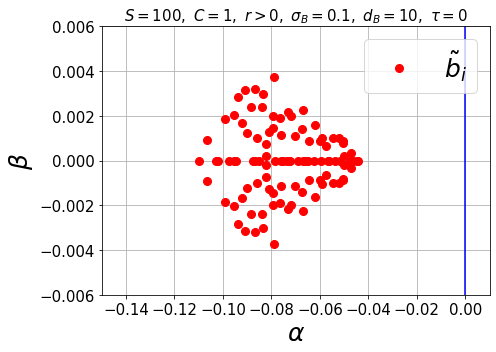

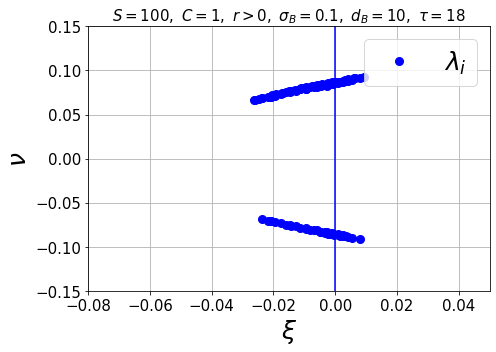

In [6]:
# This is a rutine to simulate the eigenvalues and trajectories of the 
# Delayed GLV using the Euler method with h=1. Refrence: arXiv:2110.11914


from pylab import *
from ddeint import ddeint
import matplotlib.pyplot as plt
from numpy import linalg as LA
import random
from scipy.special import lambertw
import numpy as np
def random_float(low, high):
    return random.random()*(high-low) + low

def randbin(M,N,P):              # function to generate random binary matrix    
    mat = (np.random.rand(M,N)<=P).astype(int)
    return mat  
Color = ["b", "c", "g","r","m","y"]


############### PARAMETERS ##################################
S=100                # Number of Species
C=1                  # Connectedness
sigma=.1             # standard deviation
d=-10                # self-regulation
tau=18               # discrete delay
h=1                  # step of the numerical simulation
################# plot frame ##########################################
left=-.2
right=.04
up=.025
down=-.025
a=0

############### Random Matrix ##################################


RM=(np.random.normal(0,sigma,(S,S)))
B = randbin(S,S,C)
A=np.multiply(RM,B)
np.fill_diagonal(A,d)

############### Intrinsic growth rate, r, and initials ##################################

ini=np.array(np.zeros(S))
x_fix1=np.array(np.zeros(S))
A_inv=np.linalg.inv(A)
M=np.array(np.zeros((S,S)))
DD=np.array(np.zeros((S,S)))

r=np.array(np.zeros(S))
for i in range(S):
    r[i]=random_float(.05,.1)

############### community matrix given a feasible equilbrum ##################################
    
x_fix=-A_inv@r
diag=0
for i in range(S):
    for j in range(S):
        M[i,j]=x_fix[i]*A[i,j]


        
############### Ploting the eigen values with and without delay ##################################
        
w0, v0 = LA.eig(M)
x0=w0.real
y0=w0.imag
plot1 = plt.figure(figsize=(7,5))
plt.plot(x0,y0,marker='o',color='r',markersize=8,linestyle='' ,label='$\\tilde{b}_{i}$')

tau1=0
plt.xlabel('$\\alpha$',fontsize=25)
plt.ylabel('$\\beta$',fontsize=25)

plt.title('$ S=%s,\ C=1,\ r>0, \ \sigma_B=0.1, \ d_{B}=%s,\ \\tau=%s$'% (S,-d,tau1),fontsize=15)

plt.xlim(-.15, .01)
plt.ylim(-.006, .006)
plt.grid(True)
plt.legend(fontsize=25,loc='upper right')
plt.rcParams["font.family"] = "Times New Roman"
plt.tight_layout()
g = [0,0]
h1 = [up,down]
plt.plot(g,h1,'b')
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)


# plt.savefig('/home/saeedian/Dropbox/Ecology/Figures/LVD_tau_S_lin_nonlin/LVD_M_tau0_%s_%s_%s_%s_%s.eps' % (S,C,sigma,d,tau), format='eps')

plt.show()


plot2 = plt.figure(figsize=(7,5))
Lambda=a+lambertw(w0*h*tau*math.exp(-a*tau*h))/(tau*h)
x1=Lambda.real
y1=Lambda.imag

plt.plot(x1,y1,marker='o',color='b',markersize=8,linestyle='',label='$\\lambda_{i}$')

plt.xlabel('$\\xi$',fontsize=25)
plt.ylabel('$\\nu$',fontsize=25)
plt.title('$ S=%s,\ C=1,\ r>0,\ \sigma_B=0.1, \ d_{B}=%s,\ \\tau=%s$'% (S,-d,tau*h),fontsize=15)

g = [0,0]
h1 = [10*up,10*down]
plt.plot(g,h1,'b')

plt.xlim(-.08, .05)
plt.ylim(-.15, .15)
plt.grid(True)
plt.legend(fontsize=25,loc='upper right')
plt.rcParams["font.family"] = "Times New Roman"
plt.tight_layout()
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

# plt.savefig('/home/saeedian/Dropbox/Ecology/Figures/LVD_tau_S_lin_nonlin/LVD_Lambda_tau_%s_%s_%s_%s_%s.eps' % (S,C,sigma,d,tau), format='eps')

plt.show()


In [18]:
############### Numerical simulation of the dynamics using ddeint  ##################################
import numpy as np
import random
from numpy import linalg as LA
from scipy.special import lambertw
import sys
import matplotlib.pyplot as plt

Color = ["b", "r", "g","c","m","y"]

def random_float(low, high):
    return random.random()*(high-low) + low
# Create the bifurcation diagram

def randbin(M,N,P):              # function to generate random binary matrix
    mat = (np.random.rand(M,N)<=P).astype(int)
    return mat

def L_V_D_diagram(S,C,mu,sigma,tau,tau_rand,t_f,ENS,o):


###### Initials ########################################################################################

    for x in range(S): # initials
        oo=random_float(.01,.05)
#         oo=random_float(.05,.05)
        globals()['N%s' % x] = [oo ]  
        globals()['U%s' % x] = [oo]   
        globals()['r%s' % x] = r[x]   



    if tau_rand==0:
        D=np.random.randint(-1, 1,(S,S))*0
    if tau_rand!=0:
        D=np.random.randint(-tau_rand, tau_rand,(S,S))

######## t < tau ############################################################################################

    def F0(x,i):
        mat=0
        for s in range(S):
            mat=mat+A[x,s]*globals()['N%s'%s][i]
        return mat

    for i in range(0,tau):
        for x in range(S):
            globals()['N%s'%x].append(globals()['N%s'%x][i]*(1+h*(globals()['r%s'%x]+F0(x,i)))) #  N1.append(k1*N1[g]*2/3)

######## t >=tau ####################################################################################################

    def F(x,i):
        mat=0
        for s in range(S):
            mat=mat+A[x,s]*globals()['N%s'%s][i-tau-D[x,s]]
        return mat


    for i in range(tau,t_f):
        for x in range(S):
            globals()['N%s'%x].append(globals()['N%s'%x][i]*(1+h*(globals()['r%s'%x]+F(x,i)))) #  N1.append(k1*N1[g]*2/3)
    
######## No delay ############################################################################################

    def L0(x,i):
        mat=0
        for s in range(S):
            mat=mat+A[x,s]*globals()['U%s'%s][i]
        return mat


    for i in range(0,t_f):
        for x in range(S):
            globals()['U%s'%x].append(globals()['U%s'%x][i]*(1+h*(globals()['r%s'%x]+L0(x,i)))) #  N1.append(k1*N1[g]*2/3)
    

######### Plot   ###########################################################################################
    plot1 = plt.figure(figsize=(14,5))
    for l in range(0,int(S-1)):
        plt.plot(globals()['N%s' % l],color="b" )
        plt.plot(globals()['U%s' % l],color="r" )
    plt.plot(globals()['U%s' % 1],color="r" ,label='$\\tau=0$' )
    plt.plot(globals()['N%s' % 1],color="b" ,label='$\\tau=%s$' % tau)

    plt.ylim(-.001, .14)
    plt.xlim(-10, 1010)
    plt.xlabel('$t$',fontsize=18)
    plt.ylabel('$x(t)$',fontsize=18)
    plt.title('$ S=%s,\ C=1,\ r>0, \ \sigma_B=0.1, \ d_{B}=%s,\ \\tau=%s$'% (S,-d,tau*h),fontsize=18)

    plt.grid(True)
    plt.legend(fontsize=20,loc='upper right')
    plt.text(44, .124, r'$Phase \ II $', fontsize=18)


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


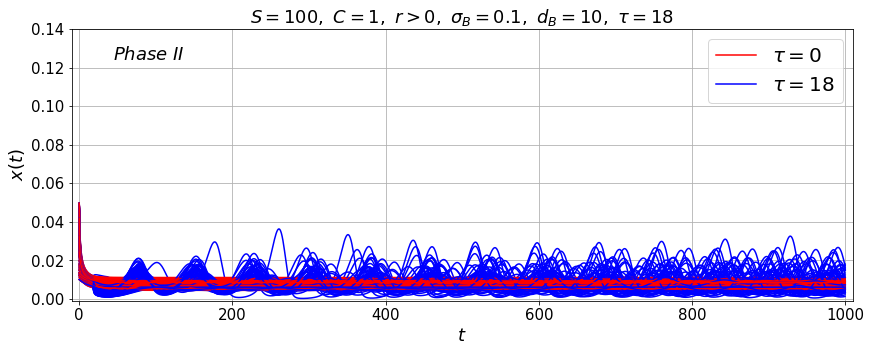

In [19]:
# L_V_D_diagram(S,C,0,sigma,tau,0,1000,1,1)
L_V_D_diagram(S,C,0,sigma,tau,0,1000,1,1)